In [7]:
#もう実行しなくていい(txtに保存した)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# 座標データを読み込み
b = np.loadtxt('C:\\Users\\ku-admin\\Desktop\\blender-windows64\\output_pineapple.txt')

# 座標情報の整数化
vertex_all = np.round(b[:, 0:3])
vertex_color_all = np.append(vertex_all, b[:, 3:6], axis=1)

# pandas DataFrameに変換して重複する座標を削除
df = pd.DataFrame(vertex_color_all)
df_grouped = df.groupby(df.iloc[:, 0:3].apply(tuple, axis=1)).first()
vertex_color = df_grouped.values

#実験：シャッフル #いらない
# np.random.shuffle(vertex_color)
# print(vertex_color)

# 色情報を0-255の範囲に正規化
colors_seikika = vertex_color[:, 3:6]
colors = colors_seikika * 255
colors = np.round(colors)

# vertex_colorをtxtファイルに出力
vertex_color[:,3:6] = colors
vertex_color = vertex_color.astype(np.int32)
print(vertex_color.shape)
np.savetxt('C:\\Users\\ku-admin\\Desktop\\game\\DCT_onlyadd\\output_vertex.txt', vertex_color[:,0:3], fmt='%d')
np.savetxt('C:\\Users\\ku-admin\\Desktop\\game\\DCT_onlyadd\\output_vertex_color.txt', vertex_color, fmt='%d')

(36049, 6)


In [3]:
#順番通りに並んだ座標＋色をつくる(新)
from tqdm import tqdm  # 進捗表示用のライブラリ
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#これでちゃんと座標を順番に取り出せる、あとは一致する色をくっつければ、目的は達成
coordinates_keiro = np.loadtxt('path_vertex.txt', delimiter=',').astype(np.int32)
vertex_color = np.loadtxt('output_vertex_color.txt')
print(vertex_color)

length = coordinates_keiro.shape[0]
coordinates_keiro_colors = np.zeros((length,6))
coordinates_keiro_colors[:,0:3] = coordinates_keiro

#vertex_color_copy =np.copy(vertex_color)

#ここもっとはやく実行できるようにする
for j in tqdm(range(length), desc='Progress'):
    for i in range(length):
        if np.array_equal(coordinates_keiro[j], vertex_color[i,0:3]):
            coordinates_keiro_colors[j,3:6] = vertex_color[i,3:6]
            vertex_color = np.delete(vertex_color, i, axis=0)  
            break

print(coordinates_keiro_colors)
print(coordinates_keiro_colors.shape)
#テキストファイルに保存して読み込むようにする
np.savetxt('C:\\Users\\ku-admin\\Desktop\\game\\DCT_onlyadd\\path_vertex_color.txt', coordinates_keiro_colors, fmt='%d')

[[  6.  47. 104. 143. 132.  78.]
 [  6.  48. 104.  65. 156.  46.]
 [  7.  46. 104. 101. 156. 123.]
 ...
 [ 84.  42. 104. 111. 156.  83.]
 [ 85.  40. 104. 227. 201. 148.]
 [ 85.  41. 104. 226. 198. 141.]]


Progress: 100%|██████████| 36049/36049 [15:15<00:00, 39.37it/s]  


[[ 44.  49.   2. 221. 178. 121.]
 [ 44.  50.   2. 177. 153.  88.]
 [ 44.  51.   2. 174. 150.  74.]
 ...
 [ 27.  73.  95.  58. 154.  39.]
 [ 28.  81. 104. 121. 141.  73.]
 [ 29.  81. 104. 117. 153.  76.]]
(36049, 6)


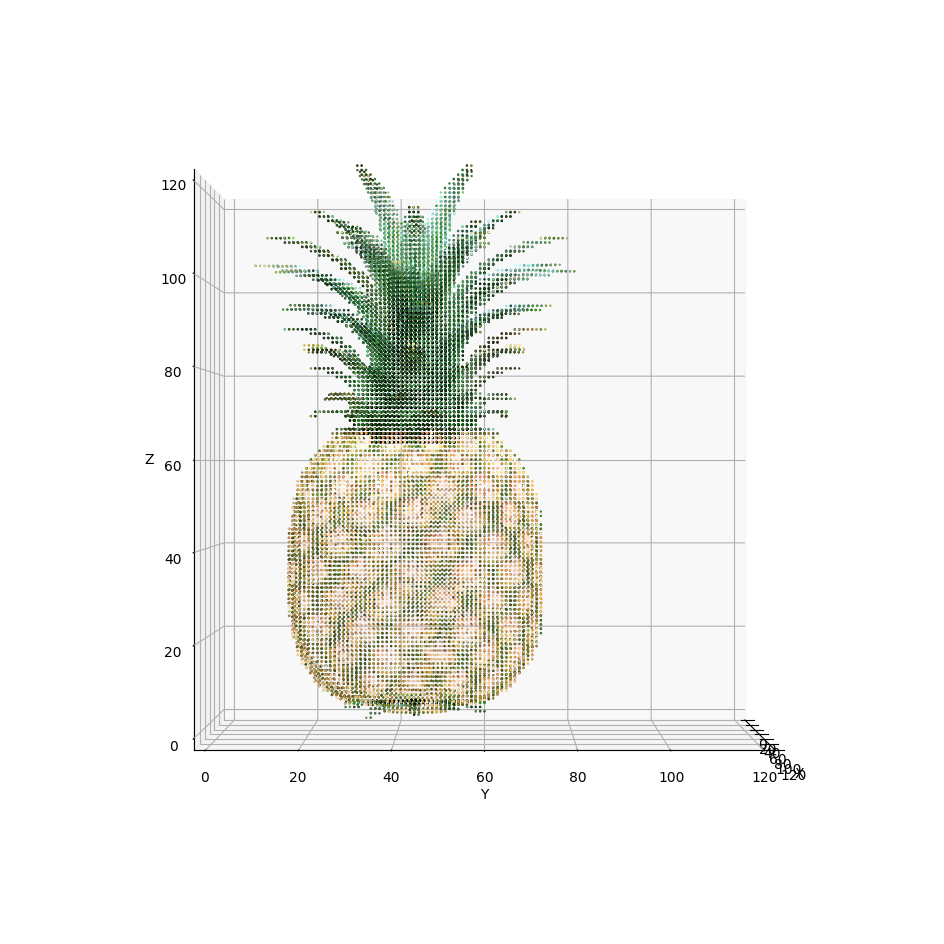

In [4]:
#あってるか表示してみる
#あってました
# Figureを追加
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,120)
ax.set_ylim(0,120)
ax.set_zlim(0,120)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(coordinates_keiro_colors[:,0], coordinates_keiro_colors[:,1], coordinates_keiro_colors[:,2], s = 0.5, c = coordinates_keiro_colors[:,3:6]/255, alpha = 1)
ax.view_init(elev=0, azim=0)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

[[ 44  49   2]
 [ 44  50   2]
 [ 44  51   2]
 [ 43  50   3]
 [ 44  51   4]
 [ 43  52   4]
 [ 42  52   4]
 [ 41  51   4]
 [ 40  51   4]
 [ 39  52   4]
 [ 39  53   4]
 [ 38  53   4]
 [ 37  52   4]
 [ 37  52   3]
 [ 37  51   4]
 [ 38  52   4]
 [ 37  53   4]
 [ 37  54   4]
 [ 38  55   4]
 [ 37  56   5]
 [ 37  57   4]
 [ 37  58   5]
 [ 37  59   5]
 [ 38  59   5]
 [ 39  60   6]
 [ 40  61   6]
 [ 41  60   5]
 [ 42  59   4]
 [ 43  60   4]
 [ 44  61   5]
 [ 44  60   5]
 [ 44  59   5]
 [ 45  59   5]
 [ 46  60   5]
 [ 46  61   6]
 [ 47  62   5]
 [ 48  63   6]
 [ 47  62   6]
 [ 47  61   6]
 [ 48  62   6]
 [ 49  63   6]
 [ 50  63   6]
 [ 51  64   7]
 [ 50  65   8]
 [ 50  66   9]
 [ 49  67   9]
 [ 50  67   9]
 [ 49  67  10]
 [ 49  68  11]
 [ 48  67  10]
 [ 47  66  10]
 [ 46  67  10]
 [ 45  67  11]
 [ 45  68  12]
 [ 44  69  13]
 [ 44  70  13]
 [ 45  69  12]
 [ 46  70  13]
 [ 46  71  14]
 [ 45  70  13]
 [ 44  70  14]
 [ 44  71  15]
 [ 43  71  16]
 [ 42  70  15]
 [ 42  70  14]
 [ 41  69  15]
 [ 40  69 

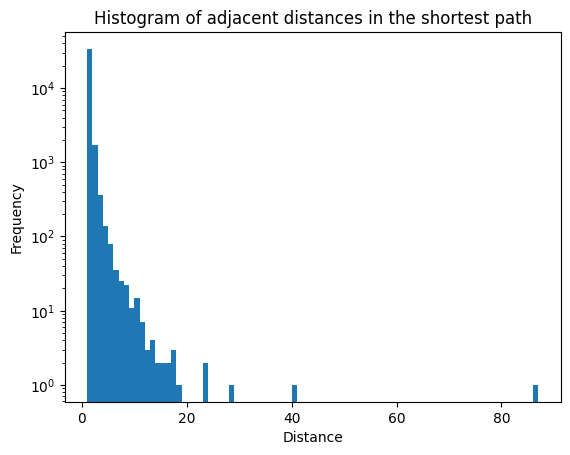

In [5]:
#命令列長をしらべる
np.set_printoptions(threshold=np.inf)


coordinates_keiro = np.loadtxt('path_vertex.txt', delimiter=',').astype(np.int32)
print(coordinates_keiro)

def calc(distances):
    sum = 0
    for i in range(len(distances)):
        if distances[i] <= 1: #距離が１の場合は５ビットでいい
            sum += 5
        else:
            sum += 21 + 5 #距離が１でない場合は５ビットに加えてフルで２１ビット使う
    return sum

#距離を計算
def distance(x, y):
    diff = np.empty((3,))
    diff[0] = np.abs(x[0] - y[0])
    diff[1] = np.abs(x[1] - y[1])
    diff[2] = np.abs(x[2] - y[2])
    max_diff = np.max(diff)
    return max_diff

# ヒストグラムをプロットする関数
def plot_histogram(distances):
    # ヒストグラムを表示
    plt.hist(distances, bins=np.arange(min(distances), max(distances) + 1))
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.yscale('log')  # 追加：縦軸をlogスケールに変更
    plt.title('Histogram of adjacent distances in the shortest path')
    plt.show()

distances = []
length = coordinates_keiro.shape[0]
for i in range(length-1):
    dist = distance(coordinates_keiro[i], coordinates_keiro[i+1])
    distances.append(dist)
    print(dist)
sum = calc(distances)
print(sum)
print(coordinates_keiro.shape[0]*21)
plot_histogram(distances)

#立方体、球などで同じことを試して、どのくらいのヒストグラムになるか →　立方体では大丈夫だった
#プログラムがおかしいのか、形状的に難しいのか
#とはいえ、100とかが頻繁に出てくるのは、経路作成の方法に問題がある気がする
#1じゃなかったときに適切な距離が計算できていない
#並列化をせずにやってみる
#並列化せずにやってダメなら、閾値を1じゃなくて2とか3にしてみる
#それでだめなら、閾値以上の時の移動の仕方を考える
#今100とかがでてきているので、移動の仕方がおかしい気がする
#並列化が原因？　すでに訪問している頂点に次の並列ブロックにいくときにジャンプしている可能性がある   